In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statistics # for variance
from scipy import stats # calculate trimmed mean

pd.set_option('display.max_rows', 426)

na_vals = ['-1', 1]
indian_food = pd.read_csv("indian_food.csv", na_values=na_vals)
indian_food['ingredients'] = indian_food['ingredients'].apply(lambda x: x.lower())

In [2]:
indian_food['num_ingr'] = indian_food['ingredients'].apply(lambda x: len(x.split(',')))

In [3]:
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3


In [4]:
indian_food.dtypes

name               object
ingredients        object
diet               object
prep_time         float64
cook_time         float64
flavor_profile     object
course             object
state              object
region             object
num_ingr            int64
dtype: object

In [5]:
round(indian_food.corr(), 3)

,prep_time,cook_time,num_ingr
prep_time,1.000,0.111,-0.081
cook_time,0.111,1.000,-0.005
num_ingr,-0.081,-0.005,1.000


In [6]:
indian_food['ingredients'].iloc[254]

'brown rice, fennel seeds, grated coconut, black pepper, ginger powder'

In [7]:
round(indian_food.describe(), 1)

,prep_time,cook_time,num_ingr
count,225.0,227.0,255.0
mean,35.4,38.9,4.5
std,76.2,49.4,1.2
min,5.0,2.0,2.0
25%,10.0,20.0,4.0
50%,10.0,30.0,5.0
75%,20.0,45.0,5.0
max,500.0,720.0,10.0


### Cook_time

In [8]:
#Kernel density plot
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

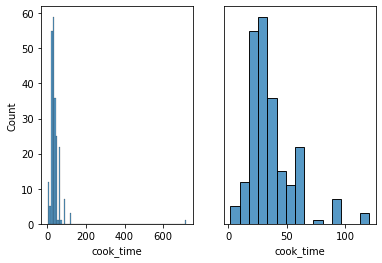

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(indian_food, x="cook_time", ax=ax1)
ax2.axes.get_yaxis().set_visible(False)
no_720 = (indian_food['cook_time'] == 720)
food = indian_food.loc[~no_720]
sns.histplot(food, x="cook_time", ax=ax2, bins=15)
plt.show()

<AxesSubplot:xlabel='cook_time', ylabel='Count'>

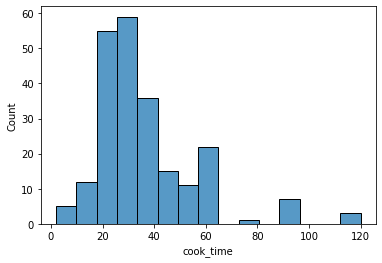

In [10]:
sns.histplot(food, x="cook_time")

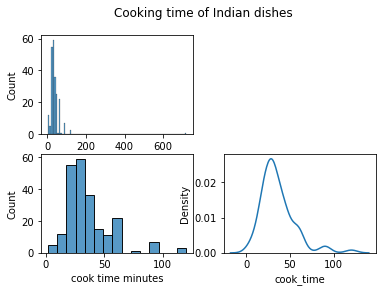

In [11]:
#plot 1:
plt.subplot(2, 2, 1)
#the figure has 1 row, 2 columns, and this plot is the first plot. 
sns.histplot(indian_food, x="cook_time")
#plt.title("Histogram of Indian dishes")
plt.xlabel("cook time minutes")
#plt.grid(axis = 'y', alpha=0.3)

#plot 2:
plt.subplot(2, 2, 3)
#the figure has 1 row, 2 columns, and this plot is the second plot. 
no_720 = (indian_food['cook_time'] == 720)
food = indian_food.loc[~no_720]
sns.histplot(food, x="cook_time")
#plt.title("Cook time histogram")
plt.xlabel("cook time minutes")

plt.suptitle("Cooking time of Indian dishes")

plt.subplot(2, 2, 4)
sns.kdeplot(data=food, x='cook_time')
#sns.boxplot(food['cook_time'], data=indian_food)

plt.show()

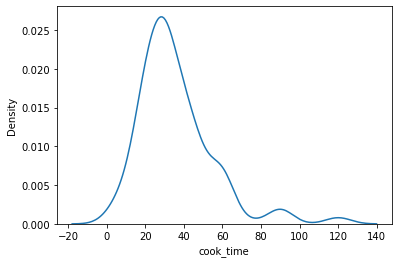

In [12]:
sns.kdeplot(data=food, x='cook_time')
plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


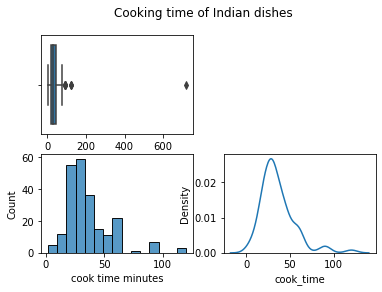

In [90]:
#fig, ax = plt.subplots(2, 2)
#fig.tight_layout()

#plot 1:
plt.subplot(2, 2, 1)
#the figure has 1 row, 2 columns, and this plot is the first plot. 
sns.boxplot(indian_food['cook_time'], data=indian_food)
#sns.histplot(indian_food, x="cook_time")
#plt.title("Histogram of Indian dishes")
plt.xlabel("cook time minutes")
#plt.grid(axis = 'y', alpha=0.3)

#plot 2:
plt.subplot(2, 2, 3)
#the figure has 1 row, 2 columns, and this plot is the second plot. 
no_720 = (indian_food['cook_time'] == 720)
food = indian_food.loc[~no_720]
sns.histplot(food, x="cook_time")
#plt.title("Cook time histogram")
plt.xlabel("cook time minutes")

#plot 3:
#plt.subplot(2, 2, 3)
#sns.boxplot(food['cook_time'], data=indian_food)

#plot 4:
plt.subplot(2, 2, 4)
sns.kdeplot(data=food, x='cook_time')
#sns.boxplot(food['cook_time'], data=indian_food)


plt.suptitle("Cooking time of Indian dishes")
fig.tight_layout()
plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


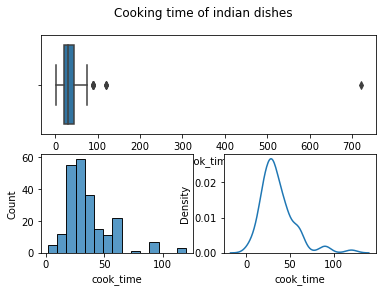

In [91]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

pl.figure()

ax = pl.subplot(gs[0, :]) # row 1, span all columns
sns.boxplot(indian_food['cook_time'], data=indian_food)

ax = pl.subplot(gs[1, 0]) # row 0, col 0
no_720 = (indian_food['cook_time'] == 720)
food = indian_food.loc[~no_720]
sns.histplot(food, x="cook_time")

ax = pl.subplot(gs[1, 1]) # row 0, col 1
sns.kdeplot(data=food, x='cook_time')

plt.suptitle("Cooking time of indian dishes")
plt.show()

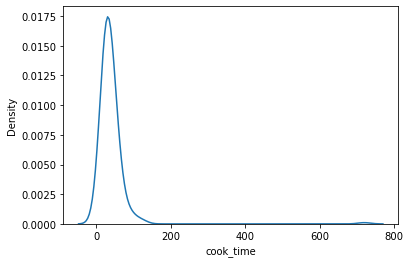

In [15]:
sns.kdeplot(data=indian_food, x='cook_time')
plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


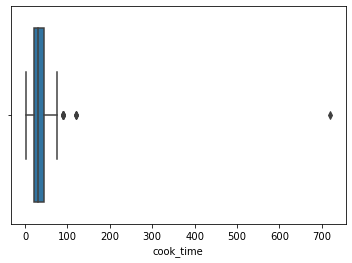

In [16]:
sns.boxplot(indian_food['cook_time'], data=indian_food)
plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cook_time'>

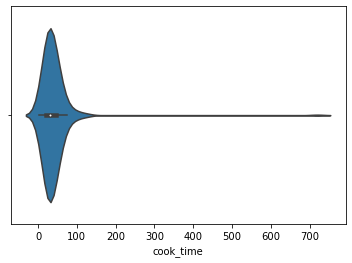

In [17]:
sns.violinplot(indian_food['cook_time'])

In [18]:
indian_food['cook_time'].describe()

count    227.000000
mean      38.911894
std       49.421711
min        2.000000
25%       20.000000
50%       30.000000
75%       45.000000
max      720.000000
Name: cook_time, dtype: float64

In [19]:
statistics.variance(indian_food['cook_time'])

nan

In [20]:
indian_food['cook_time'].median()

30.0

In [21]:
indian_food['cook_time'].mode()

0    30.0
dtype: float64

In [22]:
type(indian_food['cook_time'])

pandas.core.series.Series

In [23]:
cook_time = indian_food['cook_time'].to_numpy()
#cook_time

In [24]:
stats.trim_mean(indian_food['cook_time'], .11)

42.437185929648244

In [25]:
stats.trim_mean(cook_time, .2)

36.209150326797385

In [26]:
no_720 = (indian_food['cook_time'] == 720)
food = indian_food.loc[~no_720]

In [27]:
food['cook_time'].describe()

count    226.000000
mean      35.898230
std       19.558762
min        2.000000
25%       20.000000
50%       30.000000
75%       45.000000
max      120.000000
Name: cook_time, dtype: float64

In [28]:
food['cook_time'].median()

30.0

In [29]:
food['cook_time'].mode()

0    30.0
dtype: float64

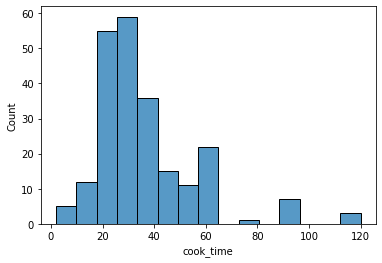

In [30]:
plt.figure()
sns.histplot(food, x="cook_time")
plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


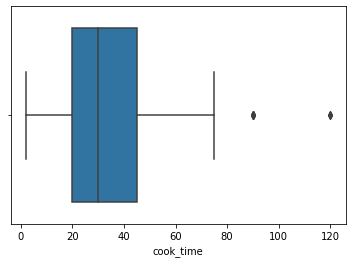

In [31]:
sns.boxplot(food['cook_time'], data=indian_food)
plt.show()

### Preparation time

In [32]:
bin_count = int(np.ceil(np.log2(255)) + 1)
bin_count

9

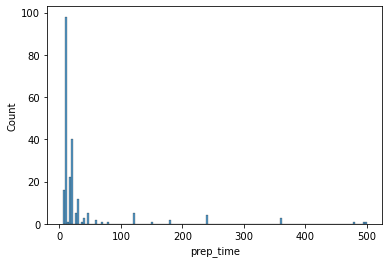

In [33]:
plt.figure()
sns.histplot(indian_food, x="prep_time")
plt.show()

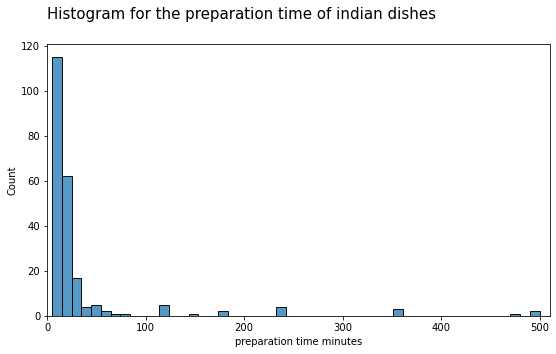

In [110]:
plt.figure(figsize=(9,5))
sns.histplot(indian_food, x="prep_time", bins= 50)
plt.title("Histogram for the preparation time of indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("preparation time minutes")
plt.xlim(0, 510)

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


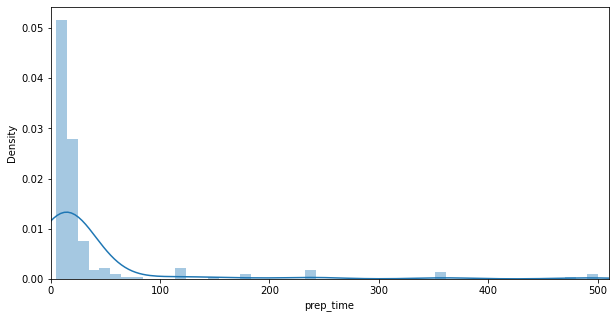

In [117]:
plt.figure(figsize=(10,5))
sns.distplot(indian_food['prep_time'], kde = True)
plt.title("Histogram for the preparation time of indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("preparation time minutes")
plt.xlim(0, 510)
plt.show()

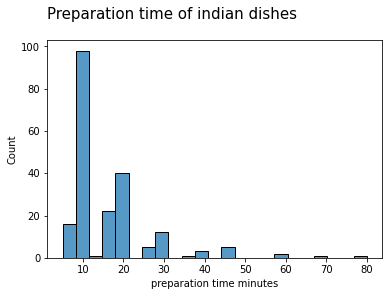

In [119]:
filt = (indian_food['prep_time'] >= 100)
prep_time = indian_food.loc[~filt]
plt.figure()
sns.histplot(prep_time, x="prep_time") # bins 25
plt.title("Preparation time of indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("preparation time minutes")
plt.show()

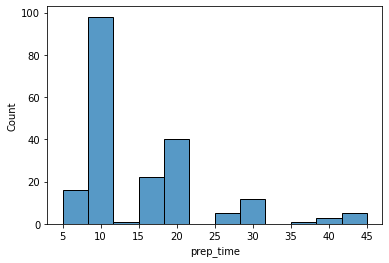

In [36]:
filt = (indian_food['prep_time'] >= 50)
prep_time = indian_food.loc[~filt]
plt.figure()
sns.histplot(prep_time, x="prep_time")
plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


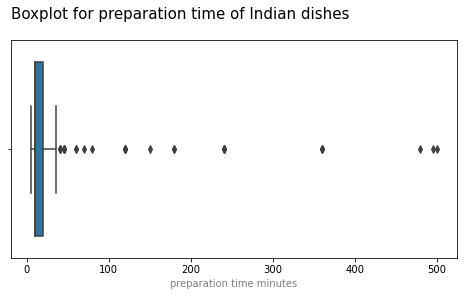

In [93]:
plt.figure(figsize=(8,4))
sns.boxplot(food['prep_time'], data=indian_food) #, color='magenta', palette='PuBuGn_r'
plt.title("Boxplot for preparation time of Indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("preparation time minutes", color='grey')
#plt.xlim(0, 500)

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='prep_time'>

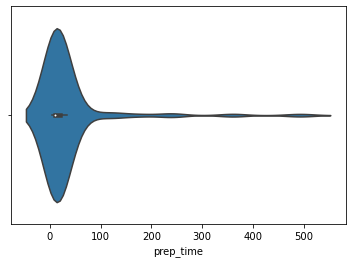

In [38]:
sns.violinplot(indian_food['prep_time'])

In [39]:
indian_food['prep_time'].describe()

count    225.000000
mean      35.386667
std       76.241081
min        5.000000
25%       10.000000
50%       10.000000
75%       20.000000
max      500.000000
Name: prep_time, dtype: float64

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


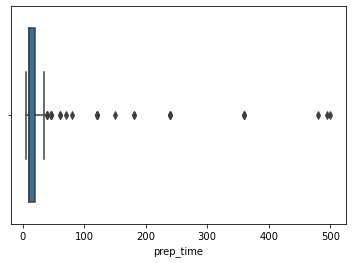

In [40]:
sns.boxplot(food['prep_time'], data=indian_food)
plt.show()

## Number of ingredients

In [124]:
indian_food['num_ingr'].value_counts()

5     139
4      40
3      36
2      20
6      14
7       2
8       2
9       1
10      1
Name: num_ingr, dtype: int64

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


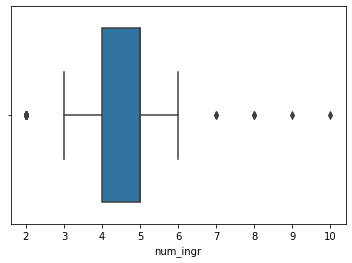

In [120]:
sns.boxplot(indian_food['num_ingr'], data=indian_food)
plt.show()

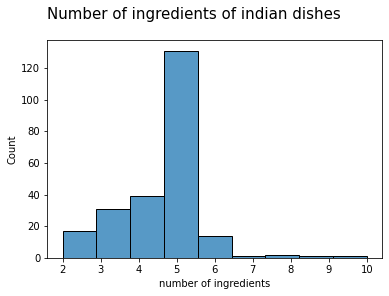

In [129]:
plt.figure()
plt.title("Number of ingredients of indian dishes", fontsize=15, loc='left', y=1.07)
sns.histplot(prep_time, x="num_ingr", bins=9)
plt.xlabel("number of ingredients")
plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


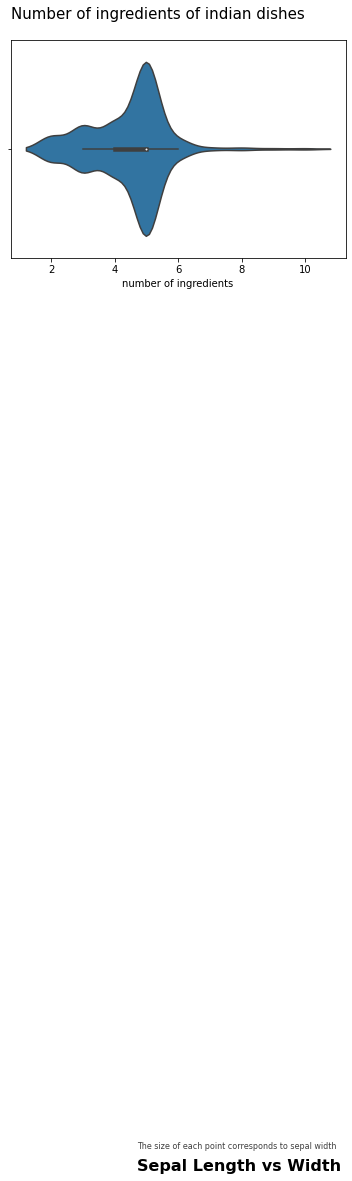

In [134]:
plt.figure()
plt.text(x=4.7, y=4.7, s='Sepal Length vs Width', fontsize=16, weight='bold')
plt.text(x=4.7, y=4.6, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75)
plt.title("Number of ingredients of indian dishes", fontsize=15, loc='left', y=1.07)
sns.violinplot(indian_food['num_ingr'])
plt.xlabel("number of ingredients")
plt.show()